## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
# Importing pandas ,numpy,matplotlib.pyplot & seaborn
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting the google drive with coolab notebook 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Defining the path where data is kept
path='/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv'
df = pd.read_csv(path)

## ***Handling missing, duplicate, and bogus values***
**Understannding the data**

In [4]:
# Checking for the data type of fields and their null or non status 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
# Check for -ve values
# Check for non numberic


#nr=df['price'].apply(lambda x : (x<0).sum() )
#nr


np.sum(np.array(df['price'])<0, axis=0)

#(df['price']<0).value_counts()
#(df['minimum_nights']<0).value_counts()
#(df['reviews_per_month']<0).value_counts()
#(df['calculated_host_listings_count']<0).value_counts()
#(df['availability_365']<0).value_counts()

0

In [7]:
np.sum(np.array(df['minimum_nights'])<0, axis=0)

0

In [8]:
np.sum(np.array(df['reviews_per_month'])<0, axis=0)

0

In [9]:
np.sum(np.array(df['calculated_host_listings_count'])<0, axis=0)

0

In [10]:
np.sum(np.array(df['availability_365'])<0, axis=0)

0

In [11]:
(df['availability_365']<0).value_counts()

False    48895
Name: availability_365, dtype: int64

In [12]:
# Checking for the exact null count of non null fields
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
# Checking to see the count of duplicate records accross the entire data frame
df.duplicated().sum()


0

In [14]:
df['id'].duplicated().sum()

0

In [15]:
df['host_id'].nunique()

37457

In [16]:
# Replacing 16 nan values in name with blank space
df['name'] = df['name'].fillna('Name Not Available')

In [17]:
# Checking the number of records where there is 0 price for an airbnb
(df['price']==0).sum()

11

In [18]:
# Removing all the records whose listed price is zero
df=df.loc[df['price']>0]
(df['price']==0).sum() # Checking if above command has worked properly

0

In [19]:
# Checking how null records look like
df[df['last_review'].isnull()].head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249


In [20]:
# Converting date str to date time object
df['last_review']=pd.to_datetime(df['last_review'])
# Checking to see if above command has worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48884 non-null  int64         
 1   name                            48884 non-null  object        
 2   host_id                         48884 non-null  int64         
 3   host_name                       48863 non-null  object        
 4   neighbourhood_group             48884 non-null  object        
 5   neighbourhood                   48884 non-null  object        
 6   latitude                        48884 non-null  float64       
 7   longitude                       48884 non-null  float64       
 8   room_type                       48884 non-null  object        
 9   price                           48884 non-null  int64         
 10  minimum_nights                  48884 non-null  int64         
 11  nu

In [21]:
# Filling the 10052 nan values in #reviews_per_month to 0  ----- if Nan is replced with 0 average reduces, hence ; leave it like that
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df[df['reviews_per_month'].isnull()].head(2) # Just verifying if earlier command worked successfully

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [22]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [23]:
# Checking the above table, we find minimum value for availability_365 = 0 and 25% of values in availability_365 is 0
# (1/4th airbnbs are avaiable for 0 night throughout the year) 
#---no_available_rooms_df=df.loc[df['availability_365']==0]
#removing all the homes which are available for zero-days
#----df=df.loc[df['availability_365']>0]



# Minimum nights change group by neighbourhood_group-- price k lie bhi 

In [24]:
# Checking the count of unique records accross each field
df.nunique()

id                                48884
name                              47895
host_id                           37455
host_name                         11450
neighbourhood_group                   5
neighbourhood                       221
latitude                          19046
longitude                         14715
room_type                             3
price                               673
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## ** Airbnb Disrtibution in different Neighbourhood Groups ** 

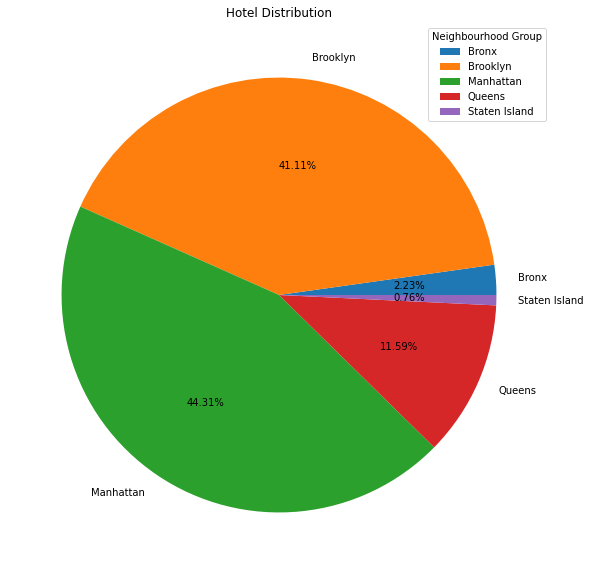

In [25]:
# Percentage share of airbnb by each neighbourhood group
import matplotlib.pyplot as plt
import seaborn as sns
#sns.distplot(df.groupby('neighbourhood_group')['neighbourhood_group'].count(), kind=pie)
plt.figure(figsize=(10,10))
mylabels = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
plt.pie(df.groupby('neighbourhood_group')['neighbourhood_group'].count() , autopct='%1.2f%%', labels = mylabels)
#plt.pie(df.groupby('neighbourhood_group')['neighbourhood_group'].count() , autopct='%1.2f%%')
plt.legend(title = "Neighbourhood Group")
plt.title("Hotel Distribution")
#plt.figure(figsize=(45,150))
plt.show()

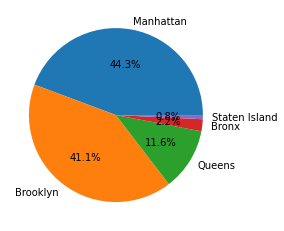

In [26]:
list_of_label=df['neighbourhood_group'].value_counts().index.to_list()
plt.pie(df['neighbourhood_group'].value_counts(),labels=list_of_label, autopct='%1.1f%%')
plt.show()


In [27]:
#neighbourhood group vs room type
#   rt1  rt2  rt3
#n1
#n2
#n3
#n4

df.groupby(['neighbourhood_group'])['room_type'].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         651
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10126
                     Entire home/apt     9558
                     Shared room          411
Manhattan            Entire home/apt    13198
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

In [28]:
# To make the above table more structured 
df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,651,60
Brooklyn,9558,10126,411
Manhattan,13198,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


# ***Plotting the distribution of Room Types in various Neighbourhood Groups*** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


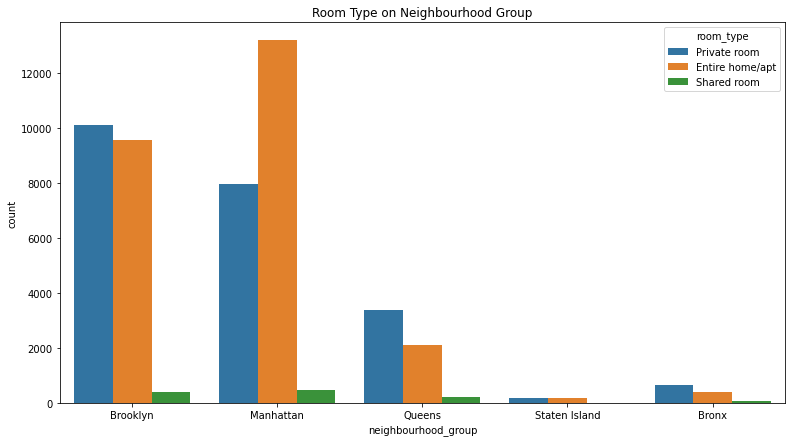

In [29]:
# Plotting the distribution of Room Types in various Neighbourhood Groups
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type)
plt.show()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

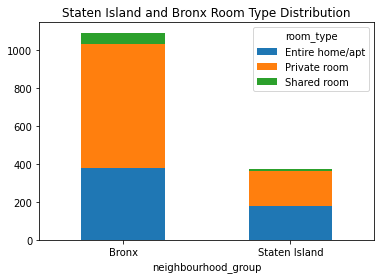

In [30]:
# Individual analysis of Staten Island and Bronx (since above plot doesnot give a readable number)
new_data_frame=df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()
new_data_frame.iloc[0:5:4].plot(kind='bar', stacked=True)
plt.title('Staten Island and Bronx Room Type Distribution')
plt.xticks(rotation=360, ha='center')

# ***Top 10 Highest Average Price Distribution of neighbourhood***

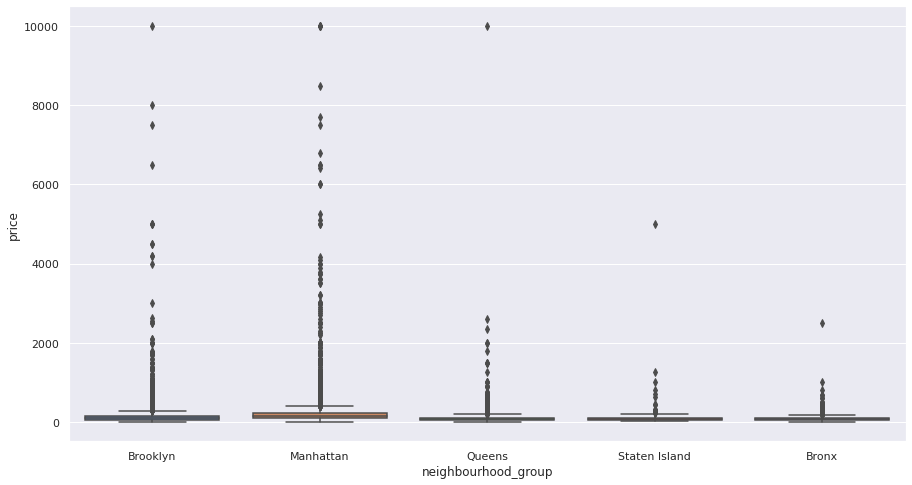

In [31]:
# Average Price Distribution of neighbourhood group
sns.set(rc={"figure.figsize":(15, 8)})
sns.boxplot(data=df, x=df['neighbourhood_group'], y=df['price'])

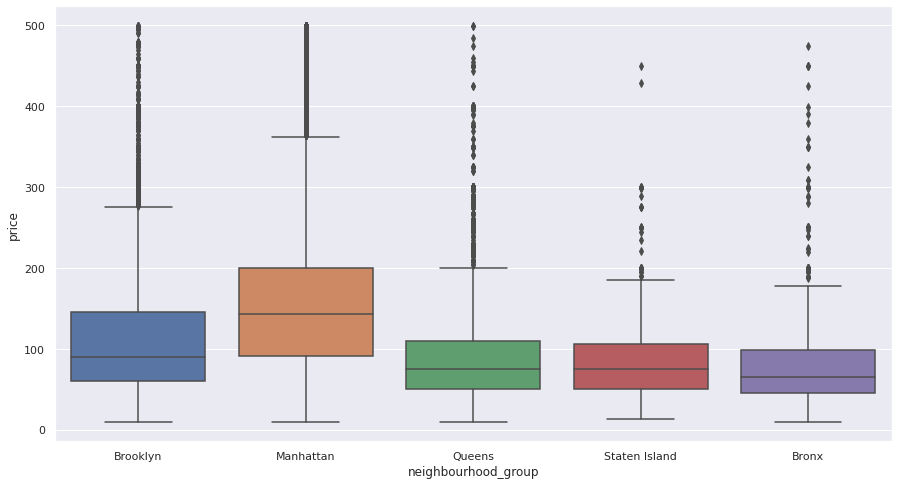

In [32]:
#  Creating a sub-dataframe with extreme values  less than 500 (To understand data that was not visible in the upper graph)
sub_df=df[df.price < 500]
sns.set(rc={"figure.figsize":(15, 8)})
sns.boxplot(data=sub_df, x=sub_df['neighbourhood_group'], y=sub_df['price'])

In [33]:
# Calculating Mean Price of the neighbourhood values
#df['neighbourhood'].value_counts().reset_index().rename(columns={"index": "neighbourhood", "neighbourhood": df['price'].mean()})
df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)
#df.groupby(['neighbourhood_group'])['room_type'].value_counts()

neighbourhood
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
                     ...    
New Dorp           57.000000
Soundview          53.466667
Tremont            51.545455
Hunts Point        50.500000
Bull's Head        47.333333
Name: price, Length: 221, dtype: float64

Text(0.5, 0, 'Average Price of Airbnb')

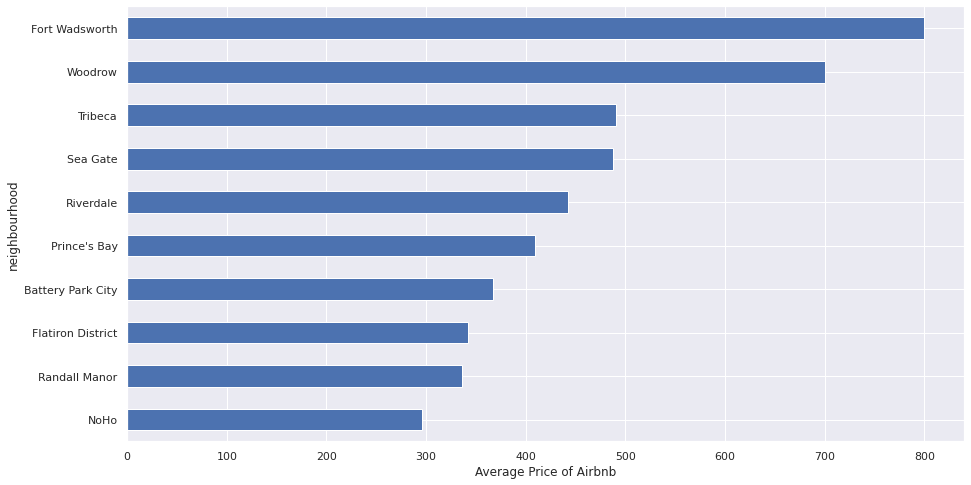

In [34]:
df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True).tail(10).plot.barh()
plt.xlabel('Average Price of Airbnb')
#sns.histplot(data=data1, y=data1)
#plt.figure(figsize=(10,10))
#sns.barplot(data=data1)

In [35]:
# Finding neighbourhood_group for top 10 neighbourhoods
data2=df.groupby(['neighbourhood','neighbourhood_group'])['price'].mean().sort_values(ascending=False)
data2.head(10)

neighbourhood      neighbourhood_group
Fort Wadsworth     Staten Island          800.000000
Woodrow            Staten Island          700.000000
Tribeca            Manhattan              490.638418
Sea Gate           Brooklyn               487.857143
Riverdale          Bronx                  442.090909
Prince's Bay       Staten Island          409.500000
Battery Park City  Manhattan              367.557143
Flatiron District  Manhattan              341.925000
Randall Manor      Staten Island          336.000000
NoHo               Manhattan              295.717949
Name: price, dtype: float64

# *** On an average for how many nights people stayed in each room_types?***

In [36]:
df.groupby(['neighbourhood_group'])['minimum_nights'].describe() #.unstack()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,4.563303,15.638775,1.0,1.0,2.0,3.0,365.0
Brooklyn,20095.0,6.055486,17.634895,1.0,2.0,3.0,5.0,999.0
Manhattan,21660.0,8.579409,24.051383,1.0,1.0,3.0,6.0,1250.0
Queens,5666.0,5.181433,15.028725,1.0,1.0,2.0,3.0,500.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


In [37]:
df.groupby(['neighbourhood_group'])['minimum_nights'].describe().transpose()

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
count,1090.000000,20095.000000,21660.000000,5666.000000,373.000000
mean,4.563303,6.055486,8.579409,5.181433,4.831099
std,15.638775,17.634895,24.051383,15.028725,19.727605
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000
50%,2.000000,3.000000,3.000000,2.000000,2.000000
75%,3.000000,5.000000,6.000000,3.000000,3.000000
max,365.000000,999.000000,1250.000000,500.000000,365.000000


In [38]:
df.groupby(['room_type','neighbourhood_group'])['minimum_nights'].mean()

room_type        neighbourhood_group
Entire home/apt  Bronx                   5.957784
                 Brooklyn                6.531492
                 Manhattan              10.539855
                 Queens                  5.369752
                 Staten Island           6.238636
Private room     Bronx                   3.861751
                 Brooklyn                5.541675
                 Manhattan               5.446880
                 Queens                  5.120107
                 Staten Island           3.632979
Shared room      Bronx                   3.366667
                 Brooklyn                7.644769
                 Manhattan               6.766667
                 Queens                  4.232323
                 Staten Island           2.333333
Name: minimum_nights, dtype: float64

In [39]:
df.groupby(['room_type','neighbourhood_group'])['minimum_nights'].mean().unstack()

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,5.957784,6.531492,10.539855,5.369752,6.238636
Private room,3.861751,5.541675,5.446880,5.120107,3.632979
Shared room,3.366667,7.644769,6.766667,4.232323,2.333333


Text(0.5, 0, 'Average of minimun_nights')

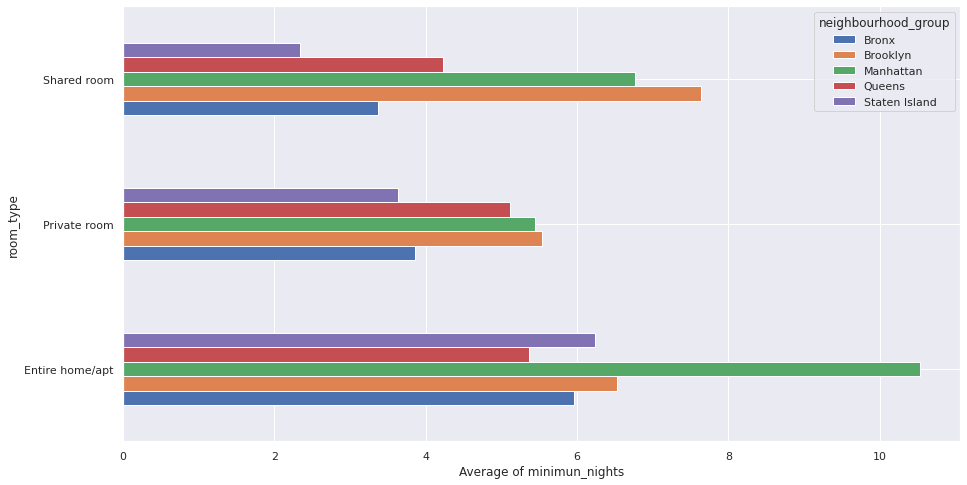

In [40]:
df.groupby(['room_type','neighbourhood_group'])['minimum_nights'].mean().unstack().plot.barh()
plt.xlabel('Average of minimun_nights')

# ***How monthly reviews varies with room types in each neighbourhood groups?***

Text(0, 0.5, 'Average of number_of_reviews')

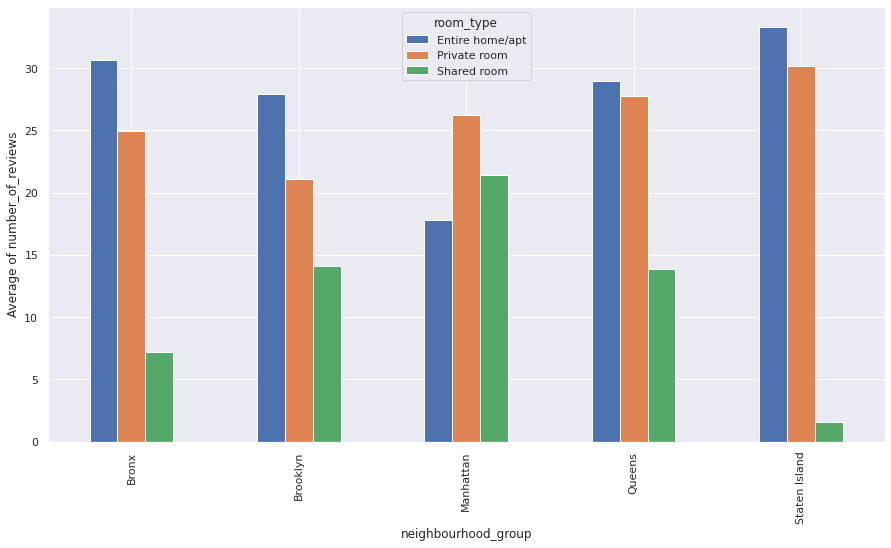

In [41]:
df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].mean().unstack().plot.bar()
plt.ylabel('Average of number_of_reviews')



In [42]:
df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].mean().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,30.678100,24.972350,7.200000
Brooklyn,27.947792,21.068635,14.077859
Manhattan,17.816866,26.202706,21.400000
Queens,28.933206,27.746441,13.863636
Staten Island,33.278409,30.159574,1.555556


# *** Top 10 reviewed hosts on the basis of reviews/month?***

In [43]:
# Case 1
df.groupby(['host_id','host_name'])['reviews_per_month'].max().sort_values(ascending=False)

host_id    host_name 
244361589  Row NYC       58.50
228415932  Louann        20.94
156684502  Nalicia       19.75
26432133   Danielle      16.22
217379941  Brent         15.78
                         ...  
24793480   Nathan         0.00
24789838   Aljosha        0.00
2891643    Jacqueline     0.00
24772574   Jack           0.00
274321313  Kat            0.00
Name: reviews_per_month, Length: 37437, dtype: float64

In [44]:
# Case 2
df.groupby(['host_name'])['reviews_per_month'].sum().sort_values(ascending=False)

host_name
David              508.61
Michael            475.82
Alex               443.44
Sonder (NYC)       397.56
John               321.02
                    ...  
Jayme                0.00
Jayd                 0.00
Jayar                0.00
JayJay               0.00
Kortney William      0.00
Name: reviews_per_month, Length: 11450, dtype: float64

In [45]:
# Why did we consider max() over sum()
# Sum() was misleading because it was giving sum of multiple airbnbs from single host_name ; hence gretaer the airbnb count for host_name gretater would be the sum
# and max() gave maximum number for reviews_per_month hence keeping in mind quality over quantity

In [46]:
df.groupby(['host_id','host_name'])['reviews_per_month'].max().sort_values(ascending=False).head(10)


host_id    host_name
244361589  Row NYC      58.50
228415932  Louann       20.94
156684502  Nalicia      19.75
26432133   Danielle     16.22
217379941  Brent        15.78
232251881  Lakshmee     15.32
47621202   Dona         14.58
259630588  Alina        14.00
266992480  Sam          14.00
55125246   Yvonne       13.48
Name: reviews_per_month, dtype: float64

Text(0.5, 0, 'Maximum of reviews_per_month')

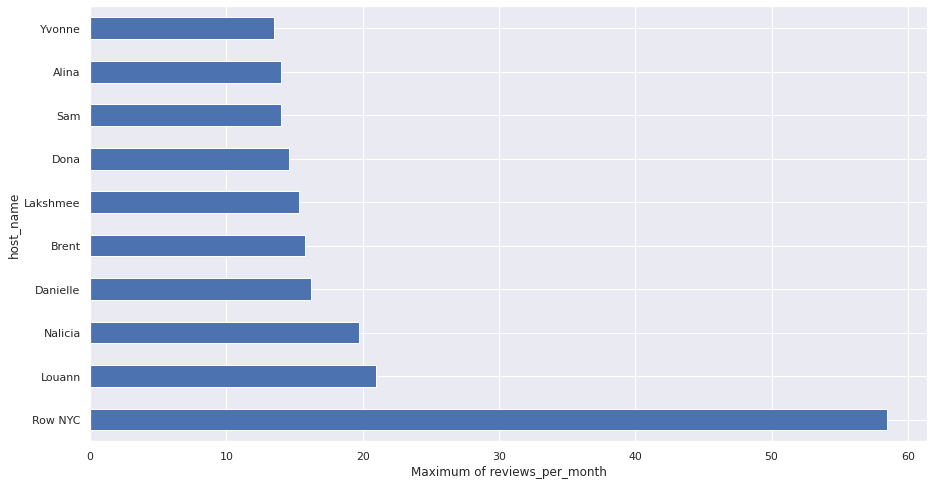

In [47]:
df.groupby(['host_name'])['reviews_per_month'].max().sort_values(ascending=False).head(10).plot.barh()
plt.xlabel('Maximum of reviews_per_month')

# *** Room_types and their relation with availability in different neighbourhood groups?***

In [48]:
df.groupby(['room_type','neighbourhood_group']).agg({'availability_365':['median','mean']})

availability_365            
                                              median        mean
room_type       neighbourhood_group                             
Entire home/apt Bronx                          131.0  158.000000
                Brooklyn                        28.0   97.207679
                Manhattan                       42.0  117.149871
                Queens                          89.0  132.267176
                Staten Island                  176.5  178.073864
Private room    Bronx                          158.0  171.399386
                Brooklyn                        24.0   99.912206
                Manhattan                       29.0  101.845026
                Queens                         108.0  149.222716
                Staten Island                  282.0  226.361702
Shared room     Bronx                           89.0  154.216667
                Brooklyn                       156.0  177.725061
                Manhattan                       81.0  138.572917
                Queens                         175.5  192.186869
                Staten Island                   37.0   64.777778

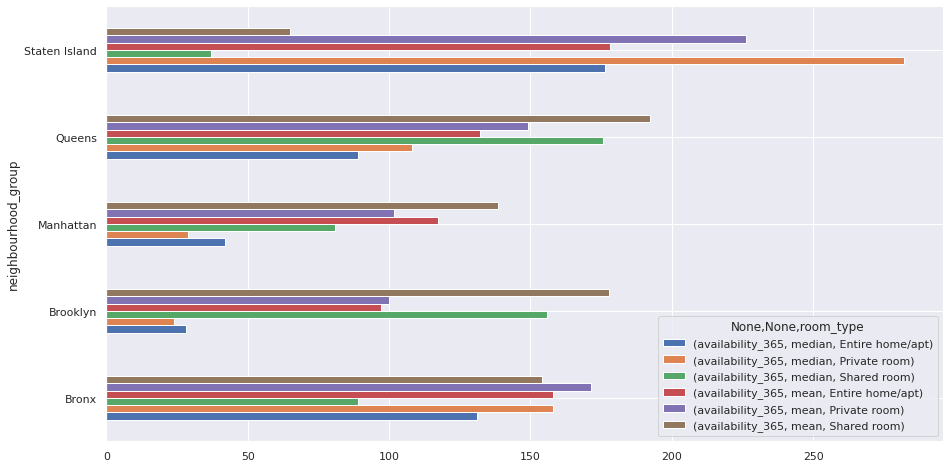

In [49]:
df.groupby(['room_type','neighbourhood_group']).agg({'availability_365':['median','mean']}).unstack(0).plot.barh()


# ***Explore relationships between the locations and neighborhoods***

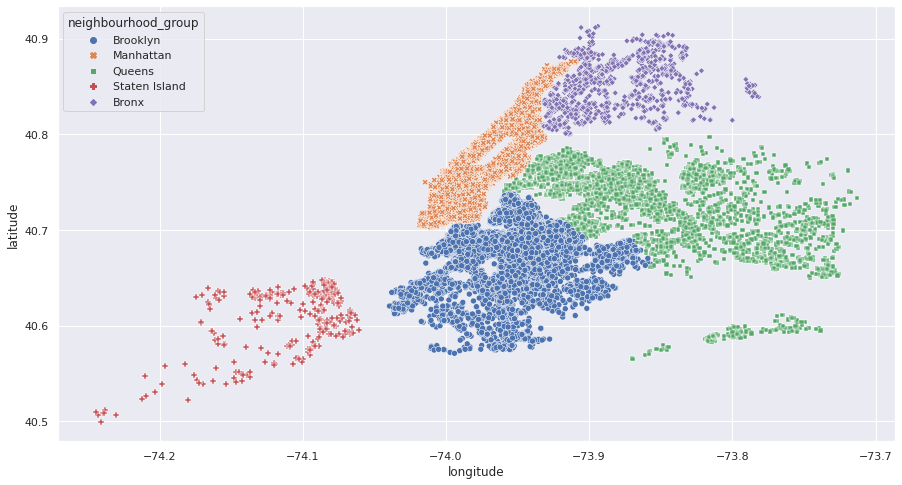

In [50]:
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group'], style=df['neighbourhood_group'])
#sns.palplot(sns.color_palette("muted"))
#sns.figsize()
sns.set(rc= {"figure.figsize": (15, 10)})
plt.show()

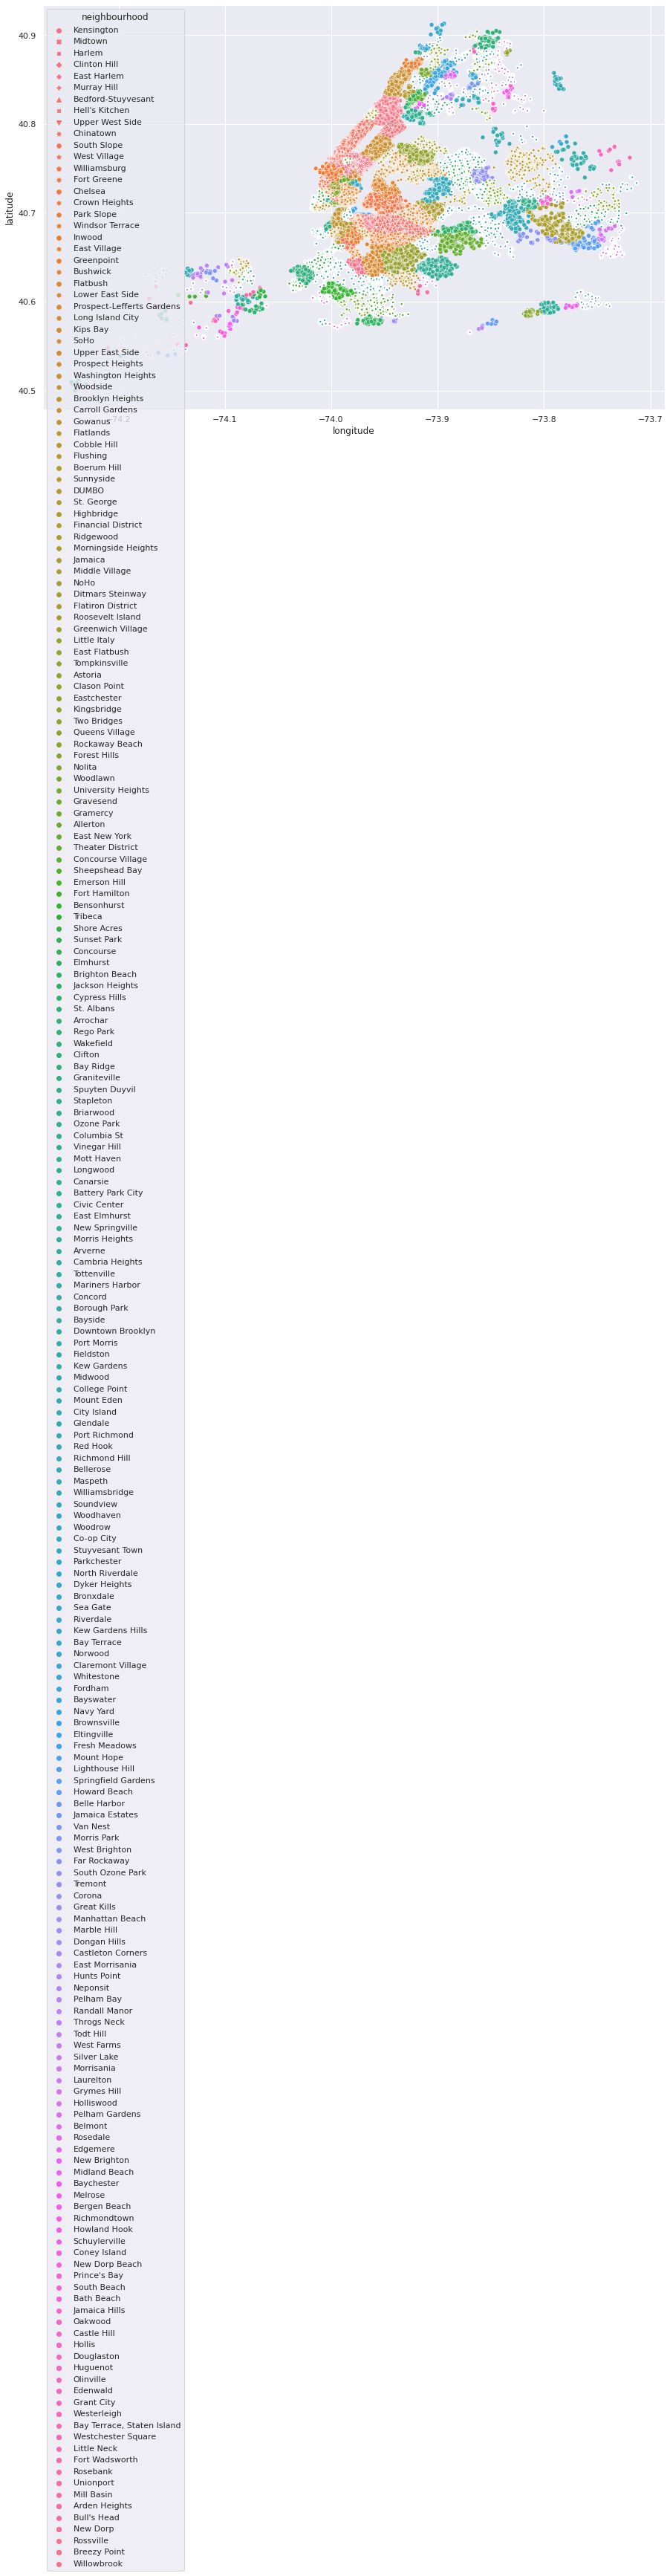

In [51]:
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood'], style=df['neighbourhood'])
sns.set(rc= {"figure.figsize": (15, 10)})
plt.show()

# ***What can we learn about different hosts and areas?***

In [75]:
 #Aaris bola ki hosts vs price leke , group by neighbourhood wise karke median price ka neighbourhoods  +5, -5  nikal lo median se, near to sasta
 
 df['total_cost'] = df['price']  * df['minimum_nights']
 df.groupby(['host_id']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(5)

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,total_cost
host_id,,,,,,,,,,
107434423,7210036953,9451.60418,-17166.13165,70331,7470,29,6.04,53824,58884,2258580
271248669,36056808,40.71206,-74.00999,6500,180,0,0.00,1,365,1170000
30283594,1611854192,4931.41347,-8952.50779,33581,3767,65,3.94,14641,37924,1164243
20582832,7003697,40.76810,-73.91651,10000,100,2,0.04,1,0,1000000
3906464,9528920,40.71355,-73.98507,9999,99,6,0.14,1,83,989901


In [67]:
df[['name','neighbourhood','host_name','host_id','total_cost']].groupby(['neighbourhood','host_id']).sum('total_cost').sort_values(by = 'total_cost',ascending=True).head(5)


,,total_cost
neighbourhood,host_id,
Williamsburg,110049861,10
Greenpoint,11967922,10
Harlem,33511962,10
Sunset Park,167570251,10
Highbridge,205820814,10


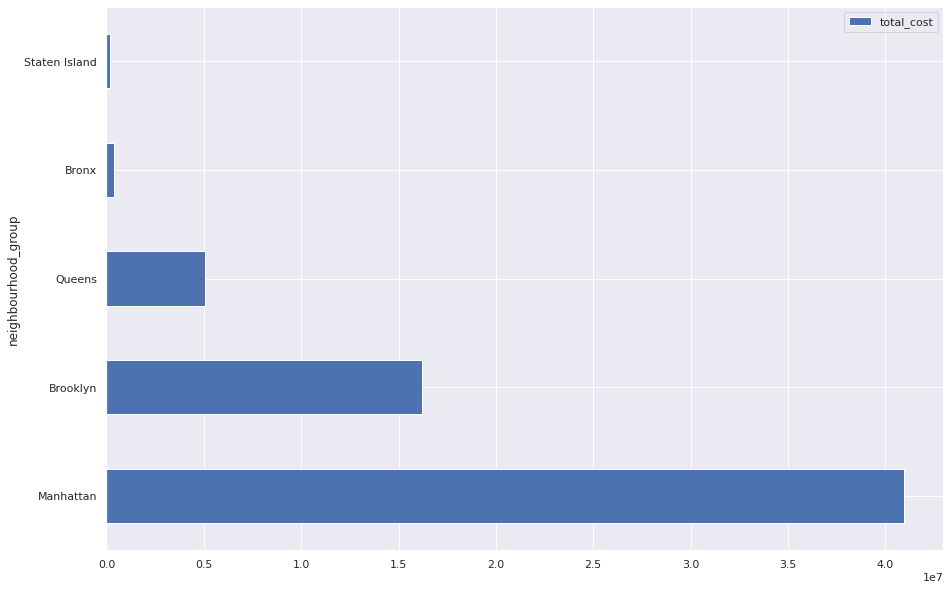

In [69]:
#which neighbourhood_group can make most money 
df[['neighbourhood_group','total_cost']].groupby(['neighbourhood_group']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(5).plot(kind = 'barh')


In [70]:
df[['neighbourhood','total_cost']].groupby(['neighbourhood']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(20) 


,total_cost
neighbourhood,
Midtown,4797807
Upper West Side,4469070
Williamsburg,3926160
Hell's Kitchen,3757457
Upper East Side,2914718
East Village,2643097
Chelsea,2517264
Bedford-Stuyvesant,2468039
Harlem,2186254


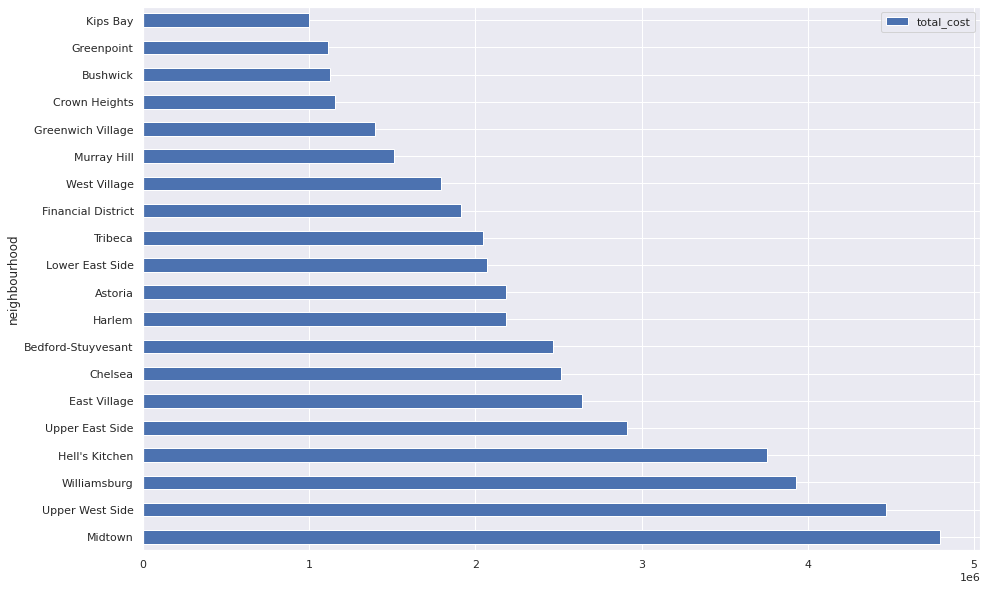

In [71]:
#which neighbourhood  make most money 
df[['neighbourhood','total_cost']].groupby(['neighbourhood']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(20).plot(kind = 'barh')
plt.rcParams["figure.figsize"] = (12,9)

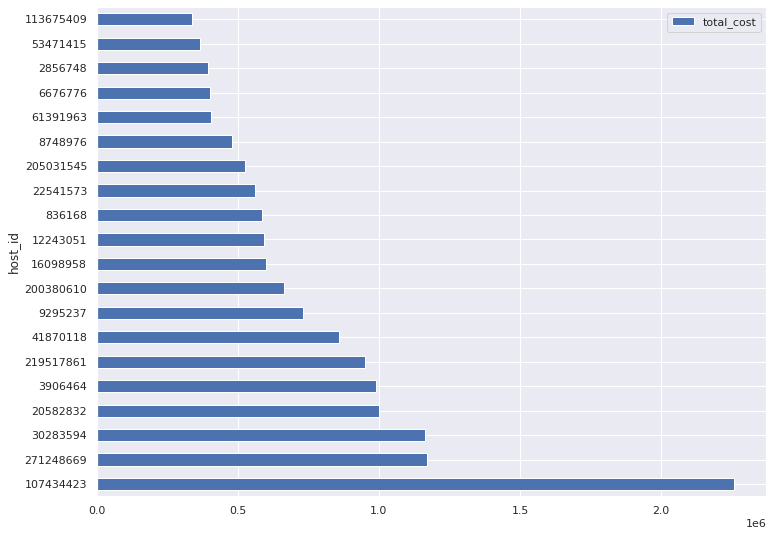

In [72]:
#which host_id can make most money 
df[['host_id','total_cost']].groupby(['host_id']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(20).plot(kind = 'barh')
plt.rcParams["figure.figsize"] = (12,9)

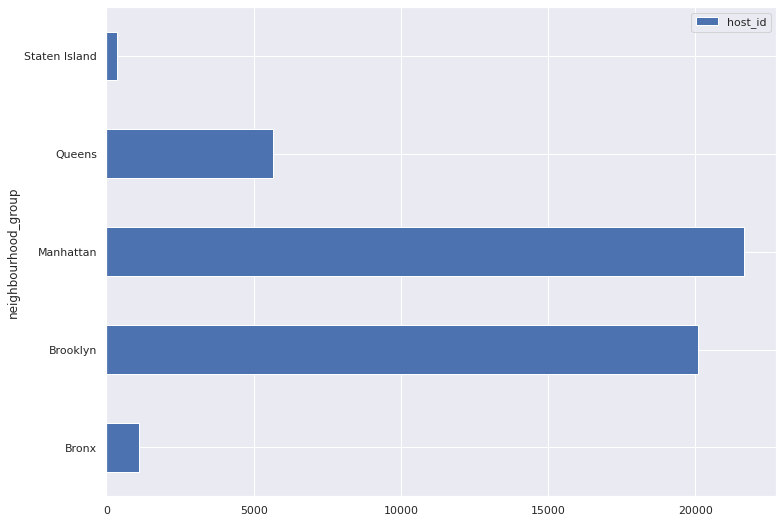

In [73]:
#where host prefer most
df[['neighbourhood_group','host_id']].groupby('neighbourhood_group').count().plot(kind = 'barh')



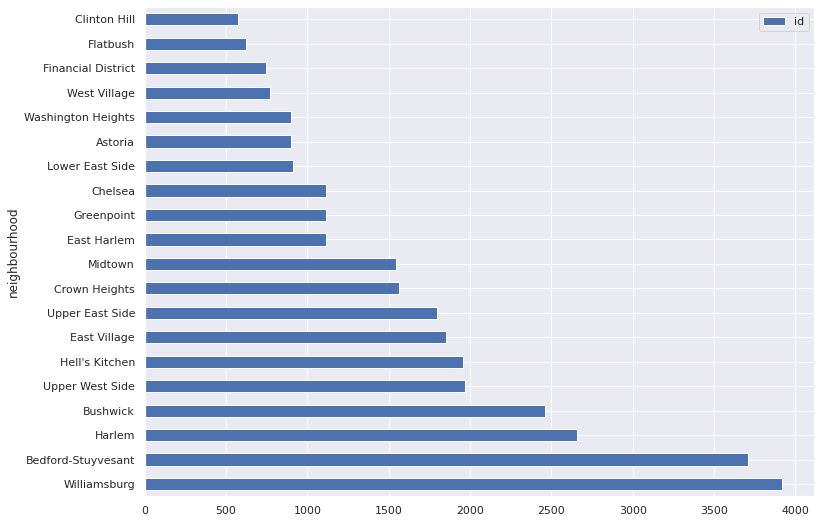

In [74]:
#which neighbourhood have most number of host
df[['neighbourhood','id']].groupby('neighbourhood').count().sort_values(by = 'id', ascending = False).head(20).plot(kind = 'barh')


# ***What can we learn from predictions? (ex: locations, prices, reviews, etc)***

In [59]:
area_review = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
area_review

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


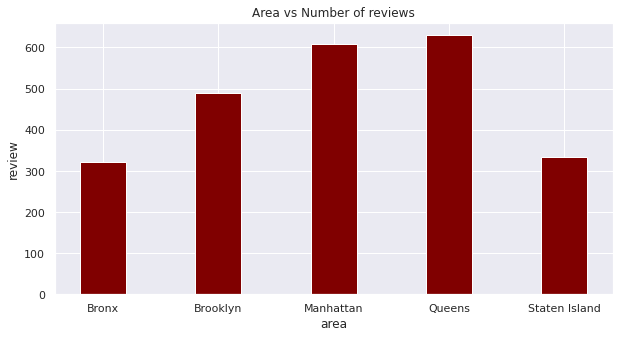

In [60]:
area = area_review['neighbourhood_group']
review = area_review['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='maroon',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [62]:
price_of_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_of_area

,price,number_of_reviews
0,10,93
1,11,113
2,12,8
3,13,9
4,15,19
...,...,...
668,7703,0
669,8000,1
670,8500,2
671,9999,6


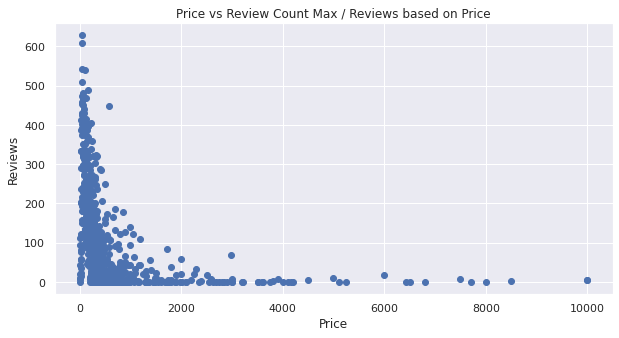

In [78]:
price1 = price_of_area ['price']
review1 = price_of_area ['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(price1, review1)
 
plt.xlabel("Price")
plt.ylabel("Reviews")
plt.title("Price vs Review Count Max / Reviews based on Price")
plt.show()

# ***Which hosts are the busiest and why?***

In [57]:
busiest_hosts = df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10278,Dona,47621202,Private room,629
17707,Jj,4734398,Private room,607
25565,Maya,37312959,Private room,543
6234,Carol,2369681,Private room,540
8946,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37746,Wanda,792159,Private room,480
22498,Linda,2680820,Private room,474
8624,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


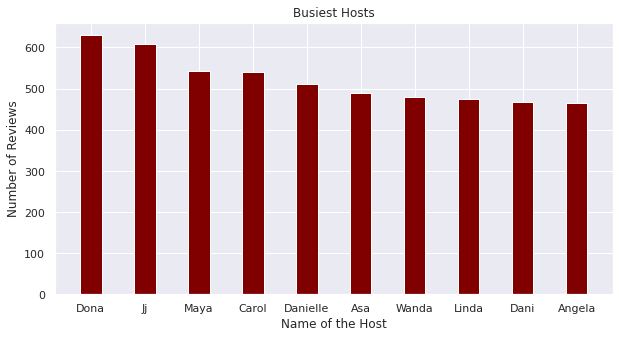

In [58]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

# ***Is there any noticeable difference of traffic among different areas and what could be the reason for it?***

Text(0.5, 1.0, 'Density of rooms')

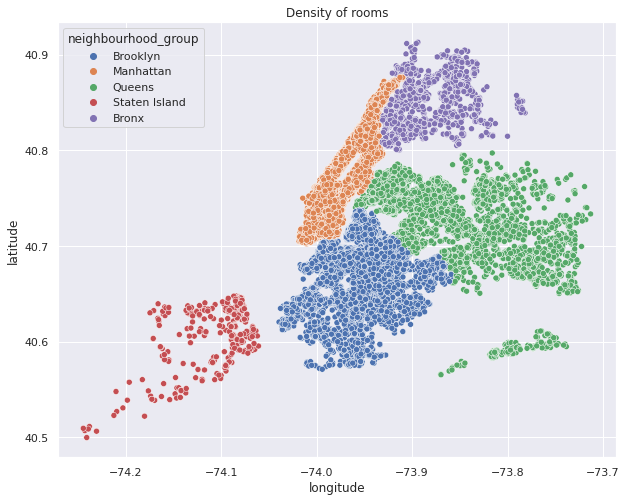

In [52]:
plt.figure(figsize=(10,8))
#creating an scaterplot
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['neighbourhood_group']).set_title('Density of rooms')

Text(0.5, 1.0, 'price density plot')

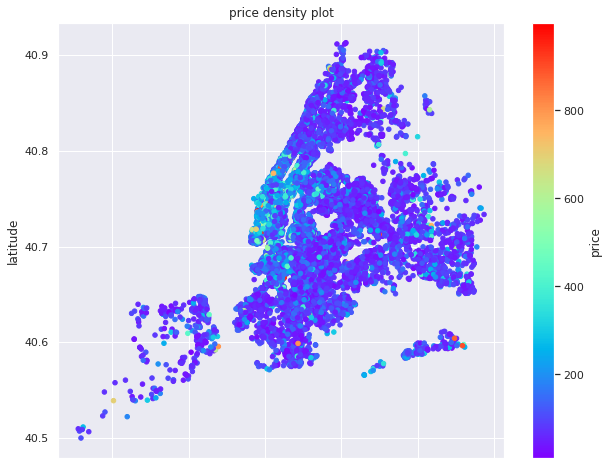

In [53]:
data = df[["latitude","longitude","price"]]
data=data[data['price']<1000]
data.plot(kind = "scatter", x = "longitude", y = "latitude",figsize = (10,8), c = "price", cmap = plt.get_cmap("rainbow"),colorbar = True).set_title('price density plot')


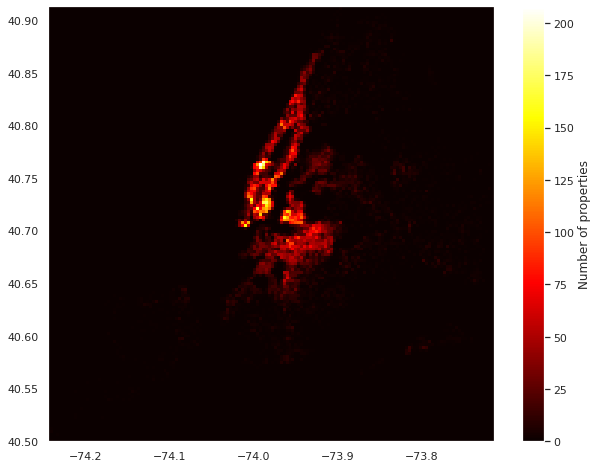

In [54]:
plt.figure(figsize = (10,8))
plt.hist2d(df.longitude, df.latitude, bins=150, cmap='hot')
plt.colorbar().set_label('Number of properties')

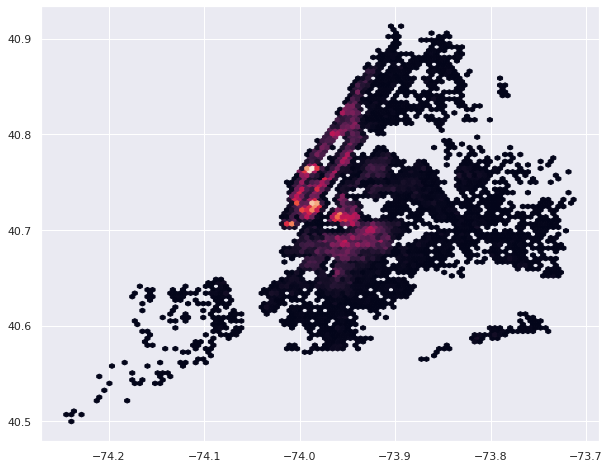

In [55]:
plt.figure(figsize=(10,8))
#creating an scaterplot
plt.hexbin(df.longitude, df.latitude,mincnt=1)

# ***What price range of rooms are more***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price density plot')

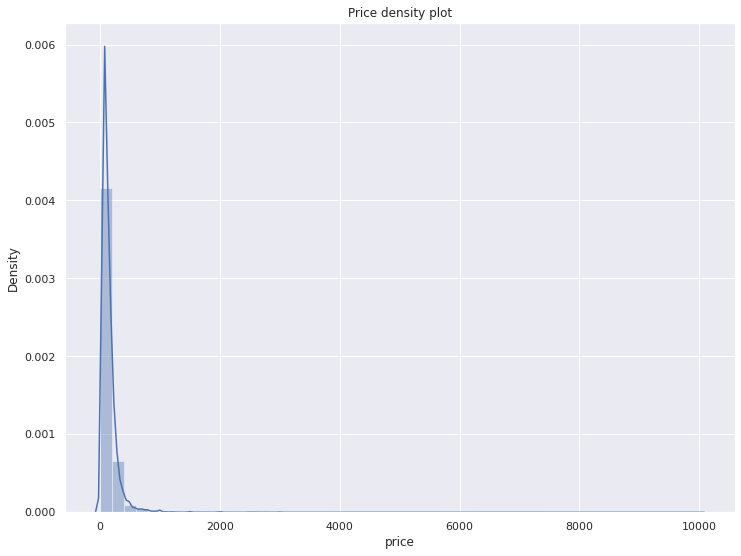

In [87]:
sns.distplot(df.price).set_title('Price density plot')
#plt.xlim(0,1000)


Text(0.5, 0, 'neighbourhood_group')

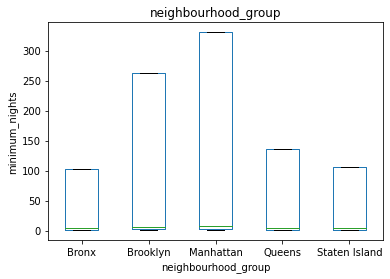

In [ ]:
import matplotlib.pyplot as plt
df.groupby(['neighbourhood_group'])['minimum_nights'].describe().transpose().plot(kind="box" , showfliers=False)
plt.title('neighbourhood_group')
plt.ylabel('minimum_nights')
plt.xlabel('neighbourhood_group')

In [ ]:
# Since maximum= Q3 + 1.5(IQR) we get 11 becuase minimum night criterion over and above 75 percentile criterion of values greater than 5 are understandable but upto 999 is not accurate

In [ ]:
df = pd.read_csv(path,parse_dates=['last_review'])

In [ ]:
#After writing parse_dates=['last_review'] using df.info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [ ]:
#last_review is now datetime64[ns] and not datetime64[ns]

In [ ]:
# is.na values and absurd numerical values of variable of interest

In [ ]:
df.groupby('neighbourhood_group')['neighbourhood_group'].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10,5))
#plt.scatter(x=df['longitude'], y=df['latitude'])

#colors = np.random.rand(N)
#plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


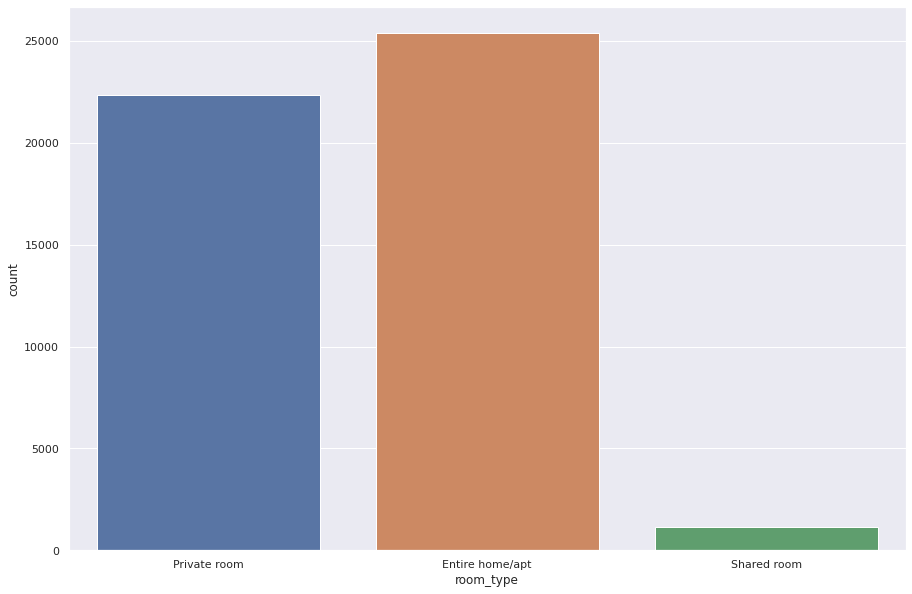

In [ ]:
sns.countplot(df.room_type)

In [ ]:
df.groupby(['neighbourhood_group'])['room_type'].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

In [ ]:
df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [ ]:
new_data_frame=df.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack()
new_data_frame

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [ ]:
new_data_frame.iloc[1:3]

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Brooklyn,9559,10132,413
Manhattan,13199,7982,480


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

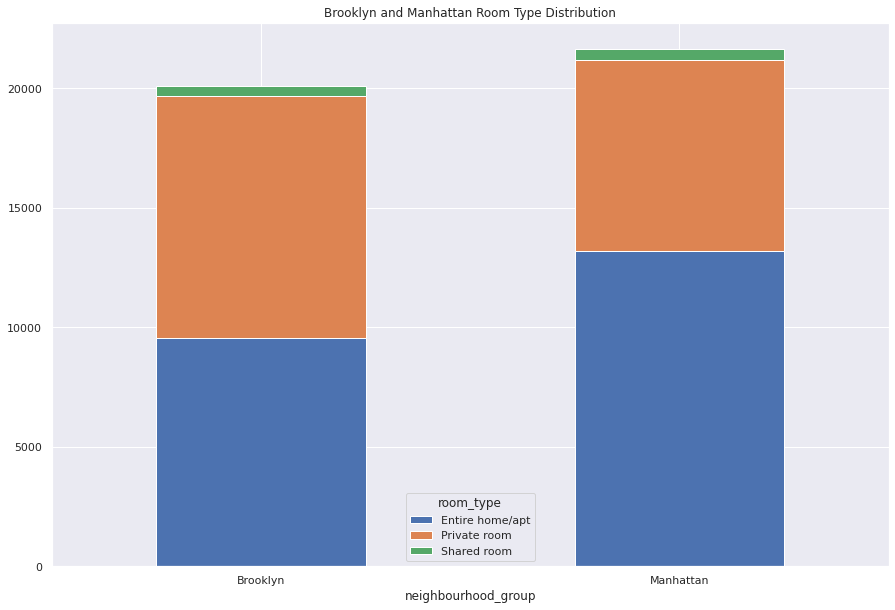

In [ ]:
new_data_frame.iloc[1:3].plot(kind='bar', stacked=True)
plt.title('Brooklyn and Manhattan Room Type Distribution')
plt.xticks(rotation=360, ha='center')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


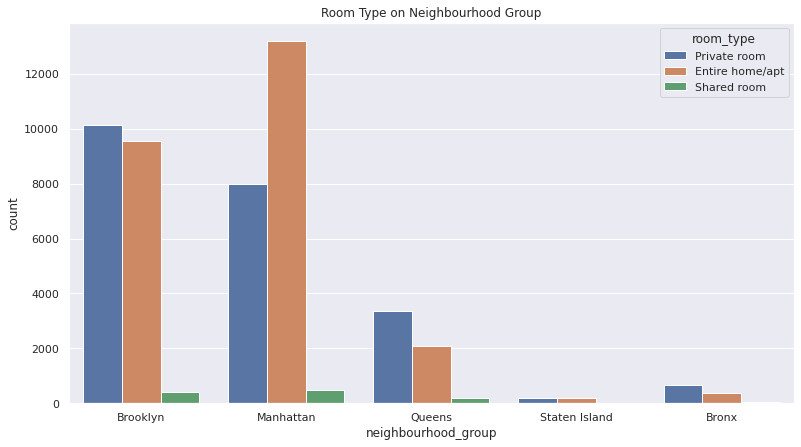

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type)
plt.show()

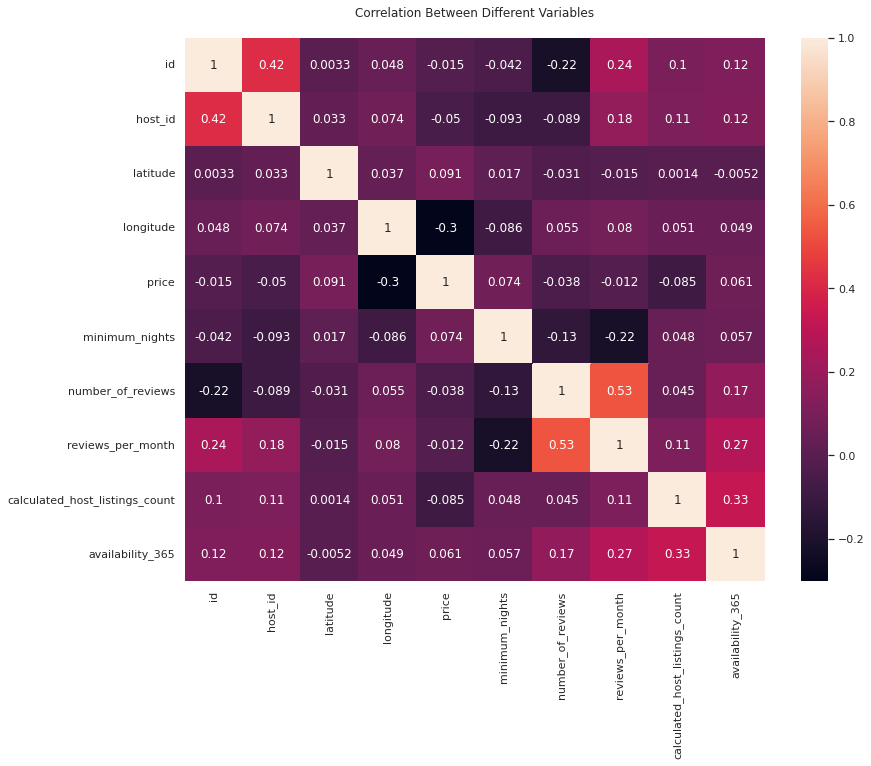

In [ ]:
corr = df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# pre cleaning result vs post cleaning result
# minimum_nights is way too absurd
#Remove unnecessary attributes -- id,host_name,host_name
# Replace null values with 0
# no rows to be removed
# my target attribute is price na so uspe zada se zada graphs